In [1]:
#Project B-
 #Social Media Sentiment Analysis
#Task: Process a dataset of tweets (columns: TweetID, Text, Likes, Date).
#Requirements:
#•	Clean text (remove special characters).
#•	Categorize tweets as "Positive," "Neutral," or "Negative" based on keywords.
#•	Calculate average likes per sentiment category.
#•	Plot sentiment distribution in a pie chart.
#Deliverable: Summary of sentiment trends and chart.


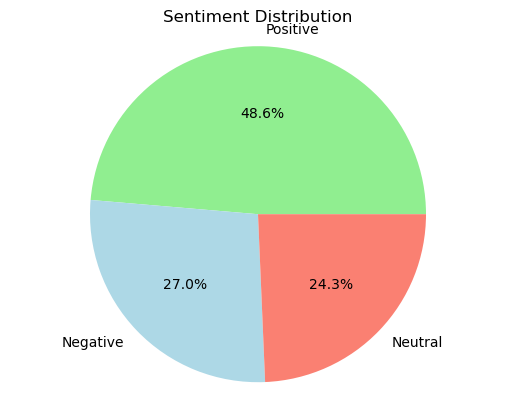


Average Likes per Sentiment:
 Sentiment
Negative     25.80
Neutral      74.44
Positive    109.00
Name: Likes, dtype: float64

Sample Positive Tweets:
                           Text  Likes
0      I love this new update!    120
1  Not happy with the service.     30
3           I like the design.     85

Sample Neutral Tweets:
                            Text  Likes
12    This doesn't work for me.     40
15   Very intuitive and useful.    125
18  Neutral opinion. Let’s see.     70

Sample Negative Tweets:
                                 Text  Likes
2   This is the worst app I've used.     20
4               Very bad experience.     25
6  I’m disappointed with the update.     45


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import re


# Clean text: remove special characters and make lowercase
def clean_text(text):
    return re.sub(r'[^A-Za-z0-9\s]', '', text).lower()

# Classify tweet as Positive, Negative, or Neutral based on keywords
def classify_sentiment(text):
    positive = ['love', 'great', 'awesome', 'good', 'amazing', 'happy', 'excellent', 'superb', 'like', 'fast', 'recommend', 'satisfied']
    negative = ['hate', 'bad', 'worst', 'poor', 'disappointed', 'not happy', 'crash', 'slow', 'terrible', 'lag', 'problem']

    if any(word in text for word in positive):
        return 'Positive'
    elif any(word in text for word in negative):
        return 'Negative'
    else:
        return 'Neutral'

def main():
    # Load tweet data from CSV
    try:
        df = pd.read_csv('tweets.csv', on_bad_lines='skip')
    except Exception as e:
        print("Error loading CSV:", e)
        return

    # Clean text and classify sentiment
    df['Cleaned_Text'] = df['Text'].apply(clean_text)
    df['Sentiment'] = df['Cleaned_Text'].apply(classify_sentiment)

    # Average likes per sentiment
    avg_likes = df.groupby('Sentiment')['Likes'].mean()

    # Plot sentiment distribution
    sentiment_counts = df['Sentiment'].value_counts()
    plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'salmon'])
    plt.title('Sentiment Distribution')
    plt.axis('equal')
    plt.show()

    # Show sample tweets and average likes
    print("\nAverage Likes per Sentiment:\n", avg_likes.round(2))
    print("\nSample Positive Tweets:\n", df[df['Sentiment'] == 'Positive'][['Text', 'Likes']].head(3))
    print("\nSample Neutral Tweets:\n", df[df['Sentiment'] == 'Neutral'][['Text', 'Likes']].head(3))
    print("\nSample Negative Tweets:\n", df[df['Sentiment'] == 'Negative'][['Text', 'Likes']].head(3))

# Start the program
if __name__ == "__main__":
    main()
